# HW3 Jiahao Sun 7438675766

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,auc
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import os
from itertools import chain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFECV
from random import sample
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
#get the 88 filenames
file_name = []
for folder_name in os.listdir("../data/AReM"):
    if folder_name.endswith('.pdf')==False:
        file_name.append([])
        for csv_name in os.listdir("../data/AReM/"+folder_name):
            file_name[-1].append("../data/AReM/"+folder_name+"/"+csv_name)

def get_dataset_number(s):
    return int(s.split('/')[4].split('.')[0][7:])

#sort the filename with dataset number
for lst in file_name:
    lst.sort(key = get_dataset_number)

In [3]:
file_name

[['../data/AReM/bending1/dataset1.csv',
  '../data/AReM/bending1/dataset2.csv',
  '../data/AReM/bending1/dataset3.csv',
  '../data/AReM/bending1/dataset4.csv',
  '../data/AReM/bending1/dataset5.csv',
  '../data/AReM/bending1/dataset6.csv',
  '../data/AReM/bending1/dataset7.csv'],
 ['../data/AReM/bending2/dataset1.csv',
  '../data/AReM/bending2/dataset2.csv',
  '../data/AReM/bending2/dataset3.csv',
  '../data/AReM/bending2/dataset4.csv',
  '../data/AReM/bending2/dataset5.csv',
  '../data/AReM/bending2/dataset6.csv'],
 ['../data/AReM/cycling/dataset1.csv',
  '../data/AReM/cycling/dataset2.csv',
  '../data/AReM/cycling/dataset3.csv',
  '../data/AReM/cycling/dataset4.csv',
  '../data/AReM/cycling/dataset5.csv',
  '../data/AReM/cycling/dataset6.csv',
  '../data/AReM/cycling/dataset7.csv',
  '../data/AReM/cycling/dataset8.csv',
  '../data/AReM/cycling/dataset9.csv',
  '../data/AReM/cycling/dataset10.csv',
  '../data/AReM/cycling/dataset11.csv',
  '../data/AReM/cycling/dataset12.csv',
  '../d

## c(ii)

## generate feature data first and then split test and train data later

In [4]:
time_series_feature = pd.DataFrame()
for folder in file_name:
    for file in folder:
        df = pd.read_csv(file,sep = ',',skiprows = 5,usecols=[1,2,3,4,5,6],\
                     header=None,names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
        df_des = df.describe().T[['min', 'max', 'mean', '50%', 'std', '25%', '75%']].reset_index(drop=True)
        colnames = [['min'+str(x), 'max'+str(x), 'mean'+str(x), 
                 'median'+str(x), 'std'+str(x), '1stQ'+str(x), '3rdQ'+str(x)] for x in range(1,7)]
        colnames = list(chain.from_iterable(colnames))
        df_des = pd.DataFrame(df_des.to_numpy().reshape(1,42), columns=colnames)
        time_series_feature = pd.concat([time_series_feature,df_des])
    

In [5]:
time_series_feature = time_series_feature.reset_index(drop=True)

In [6]:
time_series_feature

min1   max1      mean1  median1      std1  1stQ1    3rdQ1  min2   max2  \
0   37.25  45.00  40.624792    40.50  1.476967  39.25  42.0000   0.0   1.30   
1   38.00  45.67  42.812812    42.50  1.435550  42.00  43.6700   0.0   1.22   
2   35.00  47.40  43.954500    44.33  1.558835  43.00  45.0000   0.0   1.70   
3   33.00  47.75  42.179813    43.50  3.670666  39.15  45.0000   0.0   3.00   
4   33.00  45.75  41.678063    41.75  2.243490  41.33  42.7500   0.0   2.83   
..    ...    ...        ...      ...       ...    ...      ...   ...    ...   
83  19.50  45.33  33.586875    34.25  4.650935  30.25  37.0000   0.0  14.67   
84  19.75  45.50  34.322750    35.25  4.752477  31.00  38.0000   0.0  13.47   
85  19.50  46.00  34.546229    35.25  4.842294  31.25  37.8125   0.0  12.47   
86  23.50  46.25  34.873229    35.25  4.531720  31.75  38.2500   0.0  14.82   
87  19.25  44.00  34.473188    35.00  4.796705  31.25  38.0000   0.0  13.86   

       mean2  ...      std5    1stQ5  3rdQ5  min6   max6     mean6  median6  \
0   0.358604  ...  2.188449  33.0000  36.00  0.00   1.92  0.570583     0.43   
1   0.372438  ...  1.995255  32.0000  34.50  0.00   3.11  0.571083     0.43   
2   0.426250  ...  1.999604  35.3625  36.50  0.00   1.79  0.493292     0.43   
3   0.696042  ...  3.849448  30.4575  36.33  0.00   2.18  0.613521     0.50   
4   0.535979  ...  2.411026  28.4575  31.25  0.00   1.79  0.383292     0.43   
..       ...  ...       ...      ...    ...   ...    ...       ...      ...   
83  4.576562  ...  3.283983  13.7300  18.25  0.00   8.32  3.259729     3.11   
84  4.456333  ...  3.119856  13.5000  17.75  0.00   9.67  3.432562     3.20   
85  4.371958  ...  2.823124  14.0000  17.75  0.00  10.00  3.338125     3.08   
86  4.380583  ...  3.131076  13.7500  18.00  0.00   9.51  3.424646     3.27   
87  4.359312  ...  3.156320  13.7300  17.75  0.43   9.00  3.340458     3.09   

        std6   1stQ6   3rdQ6  
0   0.582915  0.0000  1.3000  
1   0.601010  0.0000  1.3000  
2   0.513506  0.0000  0.9400  
3   0.524317  0.0000  1.0000  
4   0.389164  0.0000  0.5000  
..       ...     ...     ...  
83  1.640243  2.0500  4.3225  
84  1.732727  2.1575  4.5650  
85  1.656742  2.1600  4.3350  
86  1.690960  2.1700  4.5000  
87  1.699114  2.1200  4.3750  

[88 rows x 42 columns]

## b

In [7]:
#find test and train index
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

In [8]:
test = time_series_feature.iloc[test_index,:]
train = time_series_feature.iloc[train_index,:]

In [9]:
test

min1   max1      mean1  median1      std1    1stQ1    3rdQ1  min2   max2  \
0   37.25  45.00  40.624792   40.500  1.476967  39.2500  42.0000   0.0   1.30   
1   38.00  45.67  42.812812   42.500  1.435550  42.0000  43.6700   0.0   1.22   
7   12.75  51.00  24.562958   24.250  3.737514  23.1875  26.5000   0.0   6.87   
8    0.00  42.75  27.464604   28.000  3.583582  25.5000  30.0000   0.0   7.76   
13  24.25  45.00  37.177042   36.250  3.581301  34.5000  40.2500   0.0   8.58   
14  28.75  44.75  37.561188   36.875  3.226507  35.2500  40.2500   0.0   9.91   
15  22.00  44.67  37.058708   36.000  3.710180  34.5000  40.0625   0.0  14.17   
28  23.50  30.00  27.716375   27.500  1.442253  27.0000  29.0000   0.0   1.79   
29  24.75  48.33  44.182937   48.000  7.495615  48.0000  48.0000   0.0   3.11   
30  48.00  48.25  48.004167   48.000  0.032038  48.0000  48.0000   0.0   0.43   
43  33.25  48.00  42.363563   43.000  2.068247  42.0000  43.5000   0.0   4.44   
44  37.00  50.75  45.917667   45.635  1.089027  45.0000  46.5000   0.0   4.87   
45  44.50  46.75  45.239667   45.000  0.429915  45.0000  45.3300   0.0   1.00   
58  33.33  48.00  44.334729   45.000  2.476940  42.2500  46.5000   0.0   3.90   
59  35.50  46.25  43.174938   43.670  1.989052  42.5000  44.5000   0.0   2.12   
60  32.75  47.00  42.760563   44.500  3.398919  41.3300  45.3725   0.0   3.34   
73  19.33  43.50  34.227771   35.500  4.889576  30.5000  37.7500   0.0  14.50   
74  12.50  45.00  33.509729   34.125  4.850923  30.5000  36.7500   0.0  13.05   
75  15.00  46.75  34.660583   35.000  5.315110  31.0000  38.2500   0.0  13.44   

       mean2  ...      std5    1stQ5    3rdQ5  min6  max6     mean6  median6  \
0   0.358604  ...  2.188449  33.0000  36.0000   0.0  1.92  0.570583    0.430   
1   0.372438  ...  1.995255  32.0000  34.5000   0.0  3.11  0.571083    0.430   
7   0.590833  ...  3.693786  20.5000  27.0000   0.0  4.97  0.700188    0.500   
8   0.449708  ...  5.053642  15.0000  20.7500   0.0  6.76  1.122125    0.830   
13  2.374208  ...  2.890347  17.9500  21.7500   0.0  9.34  2.921729    2.500   
14  2.080688  ...  2.727377  18.0000  21.5000   0.0  9.62  2.765896    2.450   
15  2.438146  ...  3.537144  16.0000  21.0000   0.0  8.55  2.983750    2.570   
28  0.363688  ...  4.074511   5.5000  10.7500   0.0  4.50  0.734271    0.710   
29  0.101875  ...  3.274539   2.0000   5.5425   0.0  3.91  0.692771    0.500   
30  0.007167  ...  3.268502   4.6700  10.0000   0.0  2.50  0.641229    0.500   
43  0.492563  ...  4.956821  10.1875  17.6900   0.0  6.02  1.034021    0.830   
44  0.324542  ...  3.585511  16.5000  21.0000   0.0  7.22  0.904604    0.710   
45  0.172958  ...  2.945840  17.6275  21.0000   0.0  8.20  0.837250    0.710   
58  0.432958  ...  5.401794   9.3300  17.7500   0.0  5.02  0.933000    0.830   
59  0.506583  ...  2.983976  12.7500  16.5000   0.0  5.72  0.911979    0.830   
60  0.486167  ...  4.296574  13.0000  18.5650   0.0  5.73  0.842271    0.710   
73  3.995729  ...  3.092094  14.7500  18.6700   0.0  9.74  3.394125    3.100   
74  4.450771  ...  3.133564  14.6275  18.7500   0.0  8.96  3.378479    3.085   
75  4.200896  ...  3.155015  14.2500  18.5000   0.0  8.99  3.244396    3.000   

        std6   1stQ6  3rdQ6  
0   0.582915  0.0000  1.300  
1   0.601010  0.0000  1.300  
7   0.693720  0.4300  0.870  
8   1.012342  0.4700  1.300  
13  1.852600  1.5000  3.900  
14  1.769203  1.4100  3.770  
15  1.815730  1.5000  4.150  
28  0.613688  0.4300  1.000  
29  0.675781  0.3225  0.940  
30  0.388372  0.4600  0.830  
43  0.985627  0.4700  1.250  
44  0.896171  0.4300  1.120  
45  0.835344  0.4300  1.120  
58  0.673609  0.4700  1.250  
59  0.666161  0.4700  1.220  
60  0.722165  0.4300  1.090  
73  1.792090  2.1050  4.425  
74  1.787360  2.0600  4.440  
75  1.630983  2.1200  4.240  

[19 rows x 42 columns]

## c(iii)

In [10]:
std= time_series_feature.describe().loc['std']

In [13]:
std

min1       9.569975
max1       4.394362
mean1      5.335718
median1    5.440054
std1       1.772153
1stQ1      6.153590
3rdQ1      5.138925
min2       0.000000
max2       5.062729
mean2      1.574164
median2    1.412244
std2       0.884105
1stQ2      0.946386
3rdQ2      2.125266
min3       2.956462
max3       4.875137
mean3      4.008380
median3    4.036396
std3       0.946710
1stQ3      4.220658
3rdQ3      4.171628
min4       0.000000
max4       2.183625
mean4      1.166114
median4    1.145586
std4       0.458242
1stQ4      0.843620
3rdQ4      1.552504
min5       6.124001
max5       5.741238
mean5      5.675593
median5    5.813782
std5       1.024898
1stQ5      6.096465
3rdQ5      5.531720
min6       0.045838
max6       2.518921
mean6      1.154812
median6    1.086474
std6       0.517617
1stQ6      0.758584
3rdQ6      1.523599
Name: std, dtype: float64

In [12]:
std_ci = [time_series_feature.sample(frac=1, replace=True).describe().loc['std'].values for _ in range(1000)]

In [14]:
std_ci = np.array(std_ci)

In [15]:
std_bootstrap_ci = [[round(sorted(std_ci[:,i].tolist())[50],4),round(sorted(std_ci[:,i].tolist())[949],4)] for i in range(42)]

In [16]:
pd.DataFrame(std_bootstrap_ci,index=std.index, columns=['90% Bootstrap CI lower bound','90% Bootstrap CI upper bound'])

90% Bootstrap CI lower bound  90% Bootstrap CI upper bound
min1                           8.1762                       10.7752
max1                           3.3320                        5.3268
mean1                          4.7100                        5.9181
median1                        4.7755                        6.0224
std1                           1.5643                        1.9524
1stQ1                          5.6058                        6.6824
3rdQ1                          4.3171                        5.8464
min2                           0.0000                        0.0000
max2                           4.6524                        5.4030
mean2                          1.4001                        1.7066
median2                        1.2461                        1.5442
std2                           0.8039                        0.9430
1stQ2                          0.8344                        1.0361
3rdQ2                          1.8969                        2.2929
min3                           2.7550                        3.1067
max3                           4.1824                        5.4693
mean3                          3.4415                        4.4728
median3                        3.4608                        4.5114
std3                           0.7670                        1.1102
1stQ3                          3.6597                        4.6873
3rdQ3                          3.5778                        4.6745
min4                           0.0000                        0.0000
max4                           1.9583                        2.3586
mean4                          1.0691                        1.2246
median4                        1.0483                        1.2034
std4                           0.4195                        0.4852
1stQ4                          0.7670                        0.8923
3rdQ4                          1.4200                        1.6292
min5                           4.4742                        7.4630
max5                           4.7762                        6.5382
mean5                          4.5235                        6.7290
median5                        4.6116                        6.8940
std5                           0.8139                        1.2199
1stQ5                          4.8566                        7.1744
3rdQ5                          4.4580                        6.5731
min6                           0.0000                        0.0785
max6                           2.2505                        2.7761
mean6                          1.0577                        1.2171
median6                        0.9907                        1.1477
std6                           0.4759                        0.5448
1stQ6                          0.6839                        0.8089
3rdQ6                          1.3962                        1.6016

## c(iv)

### I will use min, mean, and max. Because intuitively these time series data may be all about positions, velocity or accelerations. Therefore, if we want to classify the activities of humans using these data, we should care more about data fluctuations(e,g., acceleration changes from value 1 to value2) during the observation time but not data distribution.

## d(i)

In [17]:
di_scatter = train[['min1','mean1','max1','min2','mean2','max2','min6','mean6','max6']]
di_scatter_bending = di_scatter.iloc[0:9,]
di_scatter_notbending  = di_scatter.iloc[9:,]
di_scatter_bending['whether_bending']= 1
di_scatter_notbending['whether_bending']=0
di_scatter = pd.concat([di_scatter_bending,di_scatter_notbending])

In [18]:
di_scatter

min1      mean1   max1  min2     mean2   max2  min6     mean6   max6  \
2   35.00  43.954500  47.40   0.0  0.426250   1.70  0.00  0.493292   1.79   
3   33.00  42.179813  47.75   0.0  0.696042   3.00  0.00  0.613521   2.18   
4   33.00  41.678063  45.75   0.0  0.535979   2.83  0.00  0.383292   1.79   
5   37.00  43.454958  48.00   0.0  0.378083   1.58  0.00  0.679646   5.26   
6   36.25  43.969125  48.00   0.0  0.413125   1.50  0.00  0.555313   2.96   
..    ...        ...    ...   ...       ...    ...   ...       ...    ...   
83  19.50  33.586875  45.33   0.0  4.576562  14.67  0.00  3.259729   8.32   
84  19.75  34.322750  45.50   0.0  4.456333  13.47  0.00  3.432562   9.67   
85  19.50  34.546229  46.00   0.0  4.371958  12.47  0.00  3.338125  10.00   
86  23.50  34.873229  46.25   0.0  4.380583  14.82  0.00  3.424646   9.51   
87  19.25  34.473188  44.00   0.0  4.359312  13.86  0.43  3.340458   9.00   

    whether_bending  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
..              ...  
83                0  
84                0  
85                0  
86                0  
87                0  

[69 rows x 10 columns]

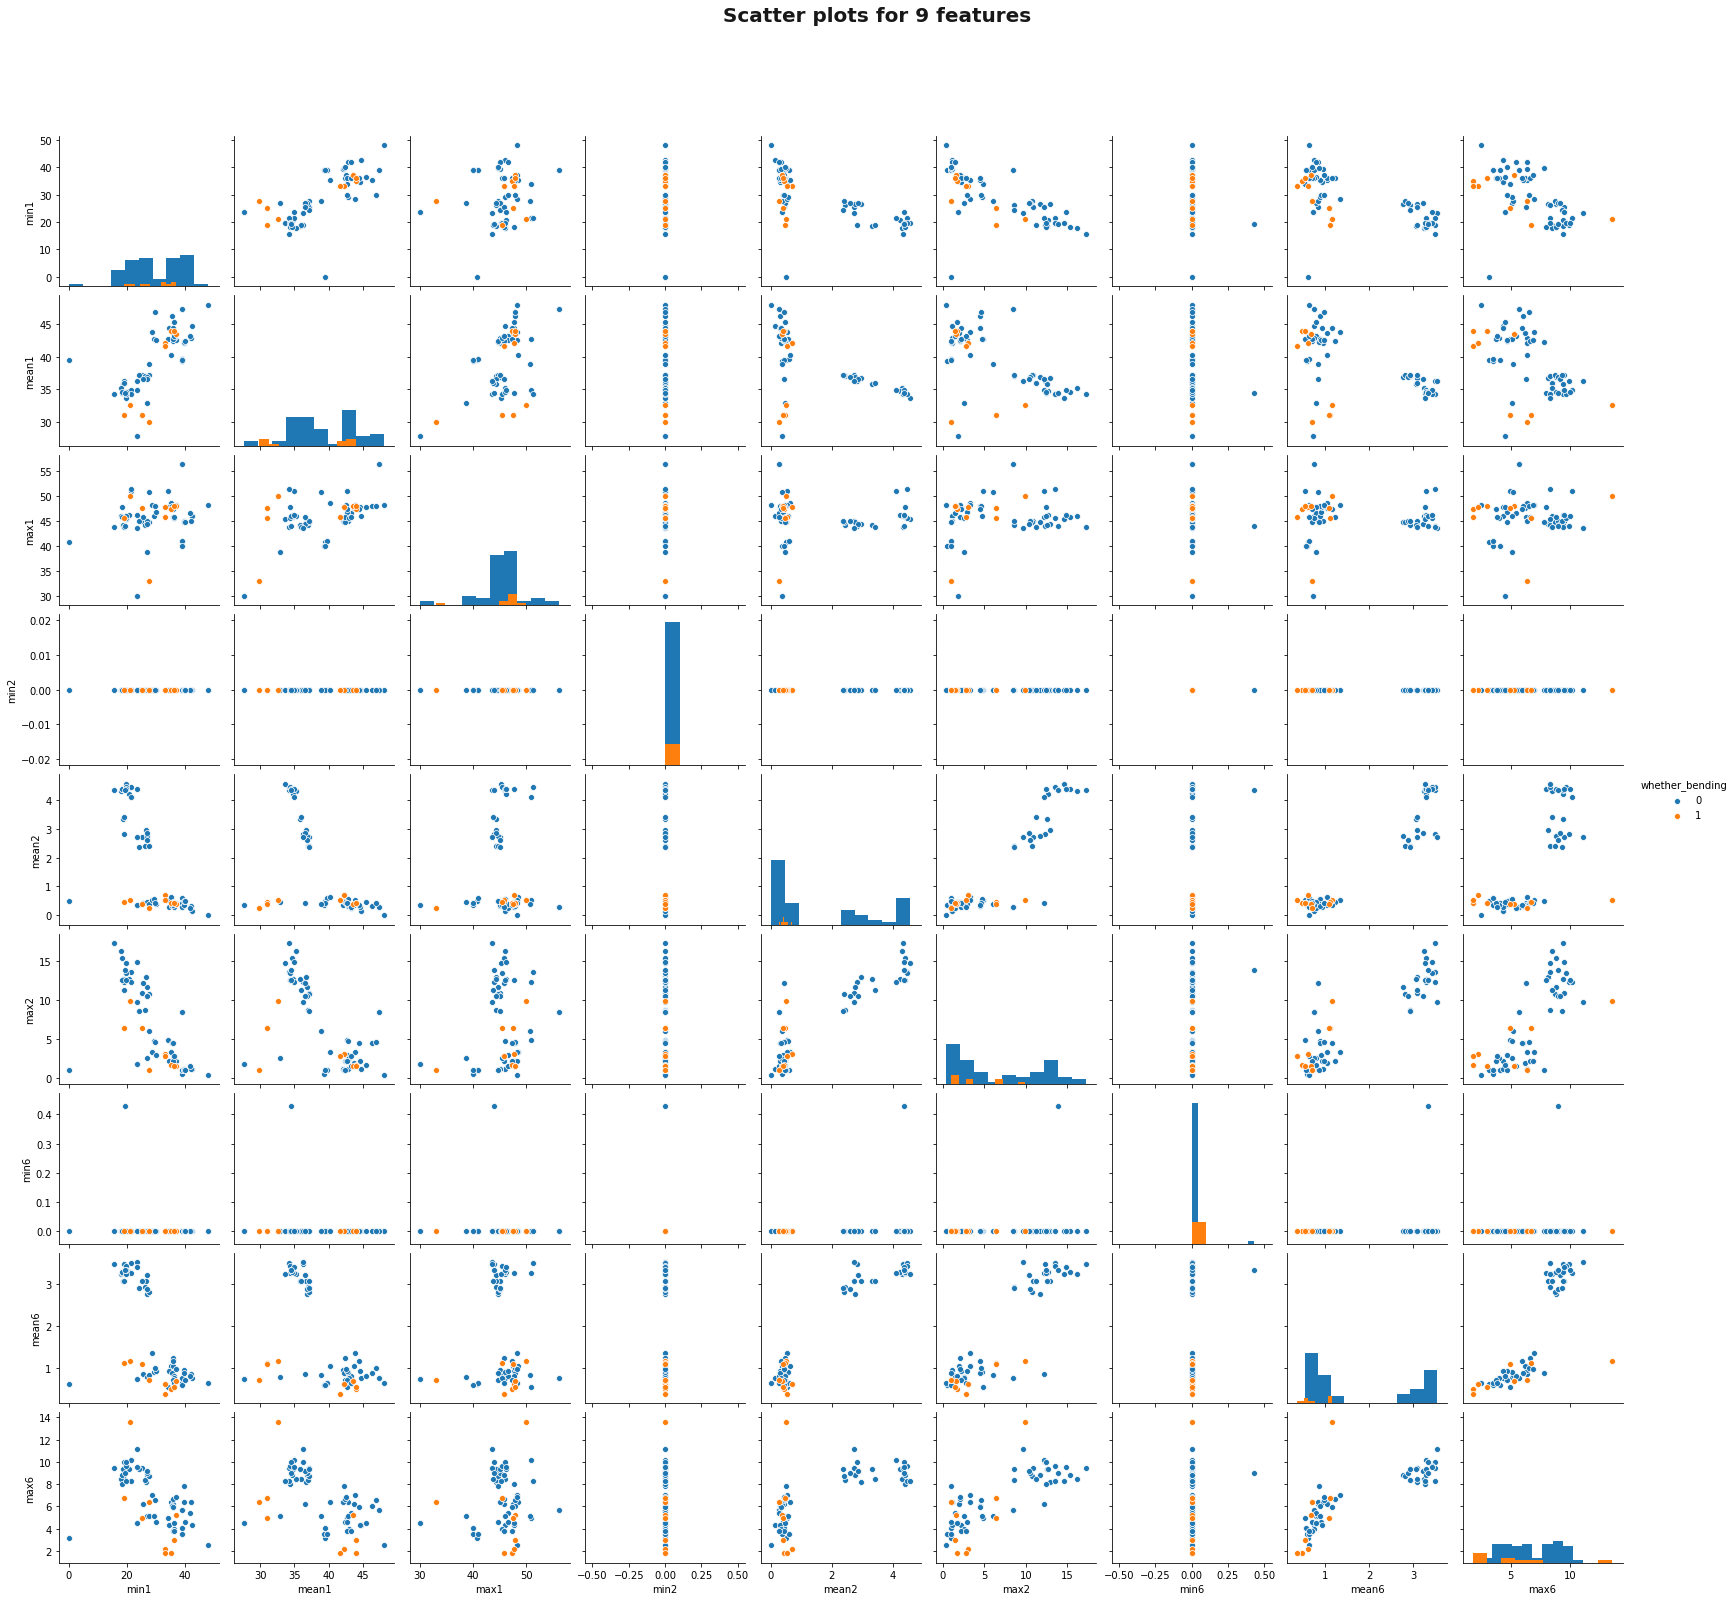

In [19]:
pairplot_1 = sns.pairplot(di_scatter,hue = 'whether_bending',vars=['min1','mean1','max1','min2','mean2','max2','min6','mean6','max6'],kind= 'scatter',diag_kind = 'hist')
plt.subplots_adjust(top=0.9)
pairplot_1.fig.suptitle("Scatter plots for 9 features", fontsize=20, alpha=0.9, weight='bold')
plt.show()

## d(ii)

In [20]:
time_series_feature_v2 = pd.DataFrame()
for folder in file_name:
    for file in folder:
        df = pd.read_csv(file,sep = ',',skiprows = 5,usecols=[1,2,3,4,5,6],\
                     header=None,names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
        df = pd.concat([df.iloc[:240,].reset_index(drop=True),df.iloc[240:,].reset_index(drop=True)],axis =1)
        df_des = df.describe().T[['min','mean', 'max']].reset_index(drop=True)
        colnames = [['min'+str(x), 'mean'+str(x), 'max'+str(x)] for x in range(1,13)]
        colnames = list(chain.from_iterable(colnames))
        df_des = pd.DataFrame(df_des.to_numpy().reshape(1,36), columns=colnames)
        time_series_feature_v2 = pd.concat([time_series_feature_v2,df_des])
time_series_feature_v2 = time_series_feature_v2.reset_index(drop=True)

In [21]:
time_series_feature_v2

min1      mean1   max1  min2     mean2   max2   min3      mean3   max3  \
0   38.00  40.946958  42.33   0.0  0.375667   1.22   4.00  17.672583  25.67   
1   41.75  42.643292  44.25   0.0  0.355000   0.94   7.00  20.369667  25.33   
2   36.50  44.057167  46.50   0.0  0.381042   1.50  14.25  23.096792  29.25   
3   33.75  43.278875  47.75   0.0  0.673292   3.00  11.00  23.141250  30.00   
4   33.00  41.621208  45.75   0.0  0.623083   2.83   3.00  19.081458  28.25   
..    ...        ...    ...   ...       ...    ...    ...        ...    ...   
83  19.50  33.334500  45.00   0.0  4.408083  11.78   7.33  15.445333  22.75   
84  20.33  34.036750  44.50   0.0  4.778292  13.47   6.25  15.177083  22.00   
85  19.50  34.033875  43.33   0.0  4.574625  12.47   7.00  15.340417  22.67   
86  24.33  34.920792  44.00   0.0  4.177958  14.82   6.67  15.515875  24.25   
87  19.25  34.916792  44.00   0.0  4.262333  13.86   6.00  15.335250  21.00   

    min4  ...   max9  min10    mean10  max10  min11     mean11  max11  min12  \
0   0.00  ...  29.50   0.00  1.076458   5.50  27.25  34.118375  38.25   0.00   
1   0.00  ...  29.50   0.00  1.109250   5.76  27.67  32.301708  38.50   0.00   
2   0.00  ...  29.75   0.00  0.501167   4.44  29.00  34.883375  38.25   0.00   
3   0.00  ...  29.25   0.00  1.171792   5.15  20.00  30.965708  38.50   0.00   
4   0.00  ...  24.00   0.00  0.568667   2.35  26.00  29.635833  36.00   0.00   
..   ...  ...    ...    ...       ...    ...    ...        ...    ...    ...   
83  0.00  ...  23.25   0.00  3.183042   9.00   6.33  15.755958  23.33   0.43   
84  0.43  ...  22.25   0.00  3.160375   7.46   6.33  15.520375  23.25   0.00   
85  0.00  ...  22.50   0.00  3.031958   8.22   7.00  15.218417  21.33   0.00   
86  0.00  ...  23.25   0.43  3.176250   9.90   5.50  15.939417  23.50   0.00   
87  0.00  ...  22.75   0.00  3.128750   8.38   5.75  15.640917  23.25   0.43   

      mean12  max12  
0   0.552167   1.92  
1   0.533583   3.11  
2   0.388333   1.50  
3   0.586083   2.18  
4   0.347500   1.50  
..       ...    ...  
83  3.290292   8.32  
84  3.321417   9.67  
85  3.432208   8.64  
86  3.418667   9.51  
87  3.241000   8.26  

[88 rows x 36 columns]

In [22]:
#find test and train index
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

train_v2 = time_series_feature_v2.iloc[train_index,:]

In [23]:
dii_scatter = train_v2[['min1','mean1','max1','min2','mean2','max2','min6','mean6','max6',\
                        'min7','mean7','max7','min8','mean8','max8','min12','mean12','max12']]
dii_scatter_bending = dii_scatter.iloc[0:9,]
dii_scatter_notbending  = dii_scatter.iloc[9:,]
dii_scatter_bending['whether_bending']= 1
dii_scatter_notbending['whether_bending']=0
dii_scatter = pd.concat([dii_scatter_bending,dii_scatter_notbending])

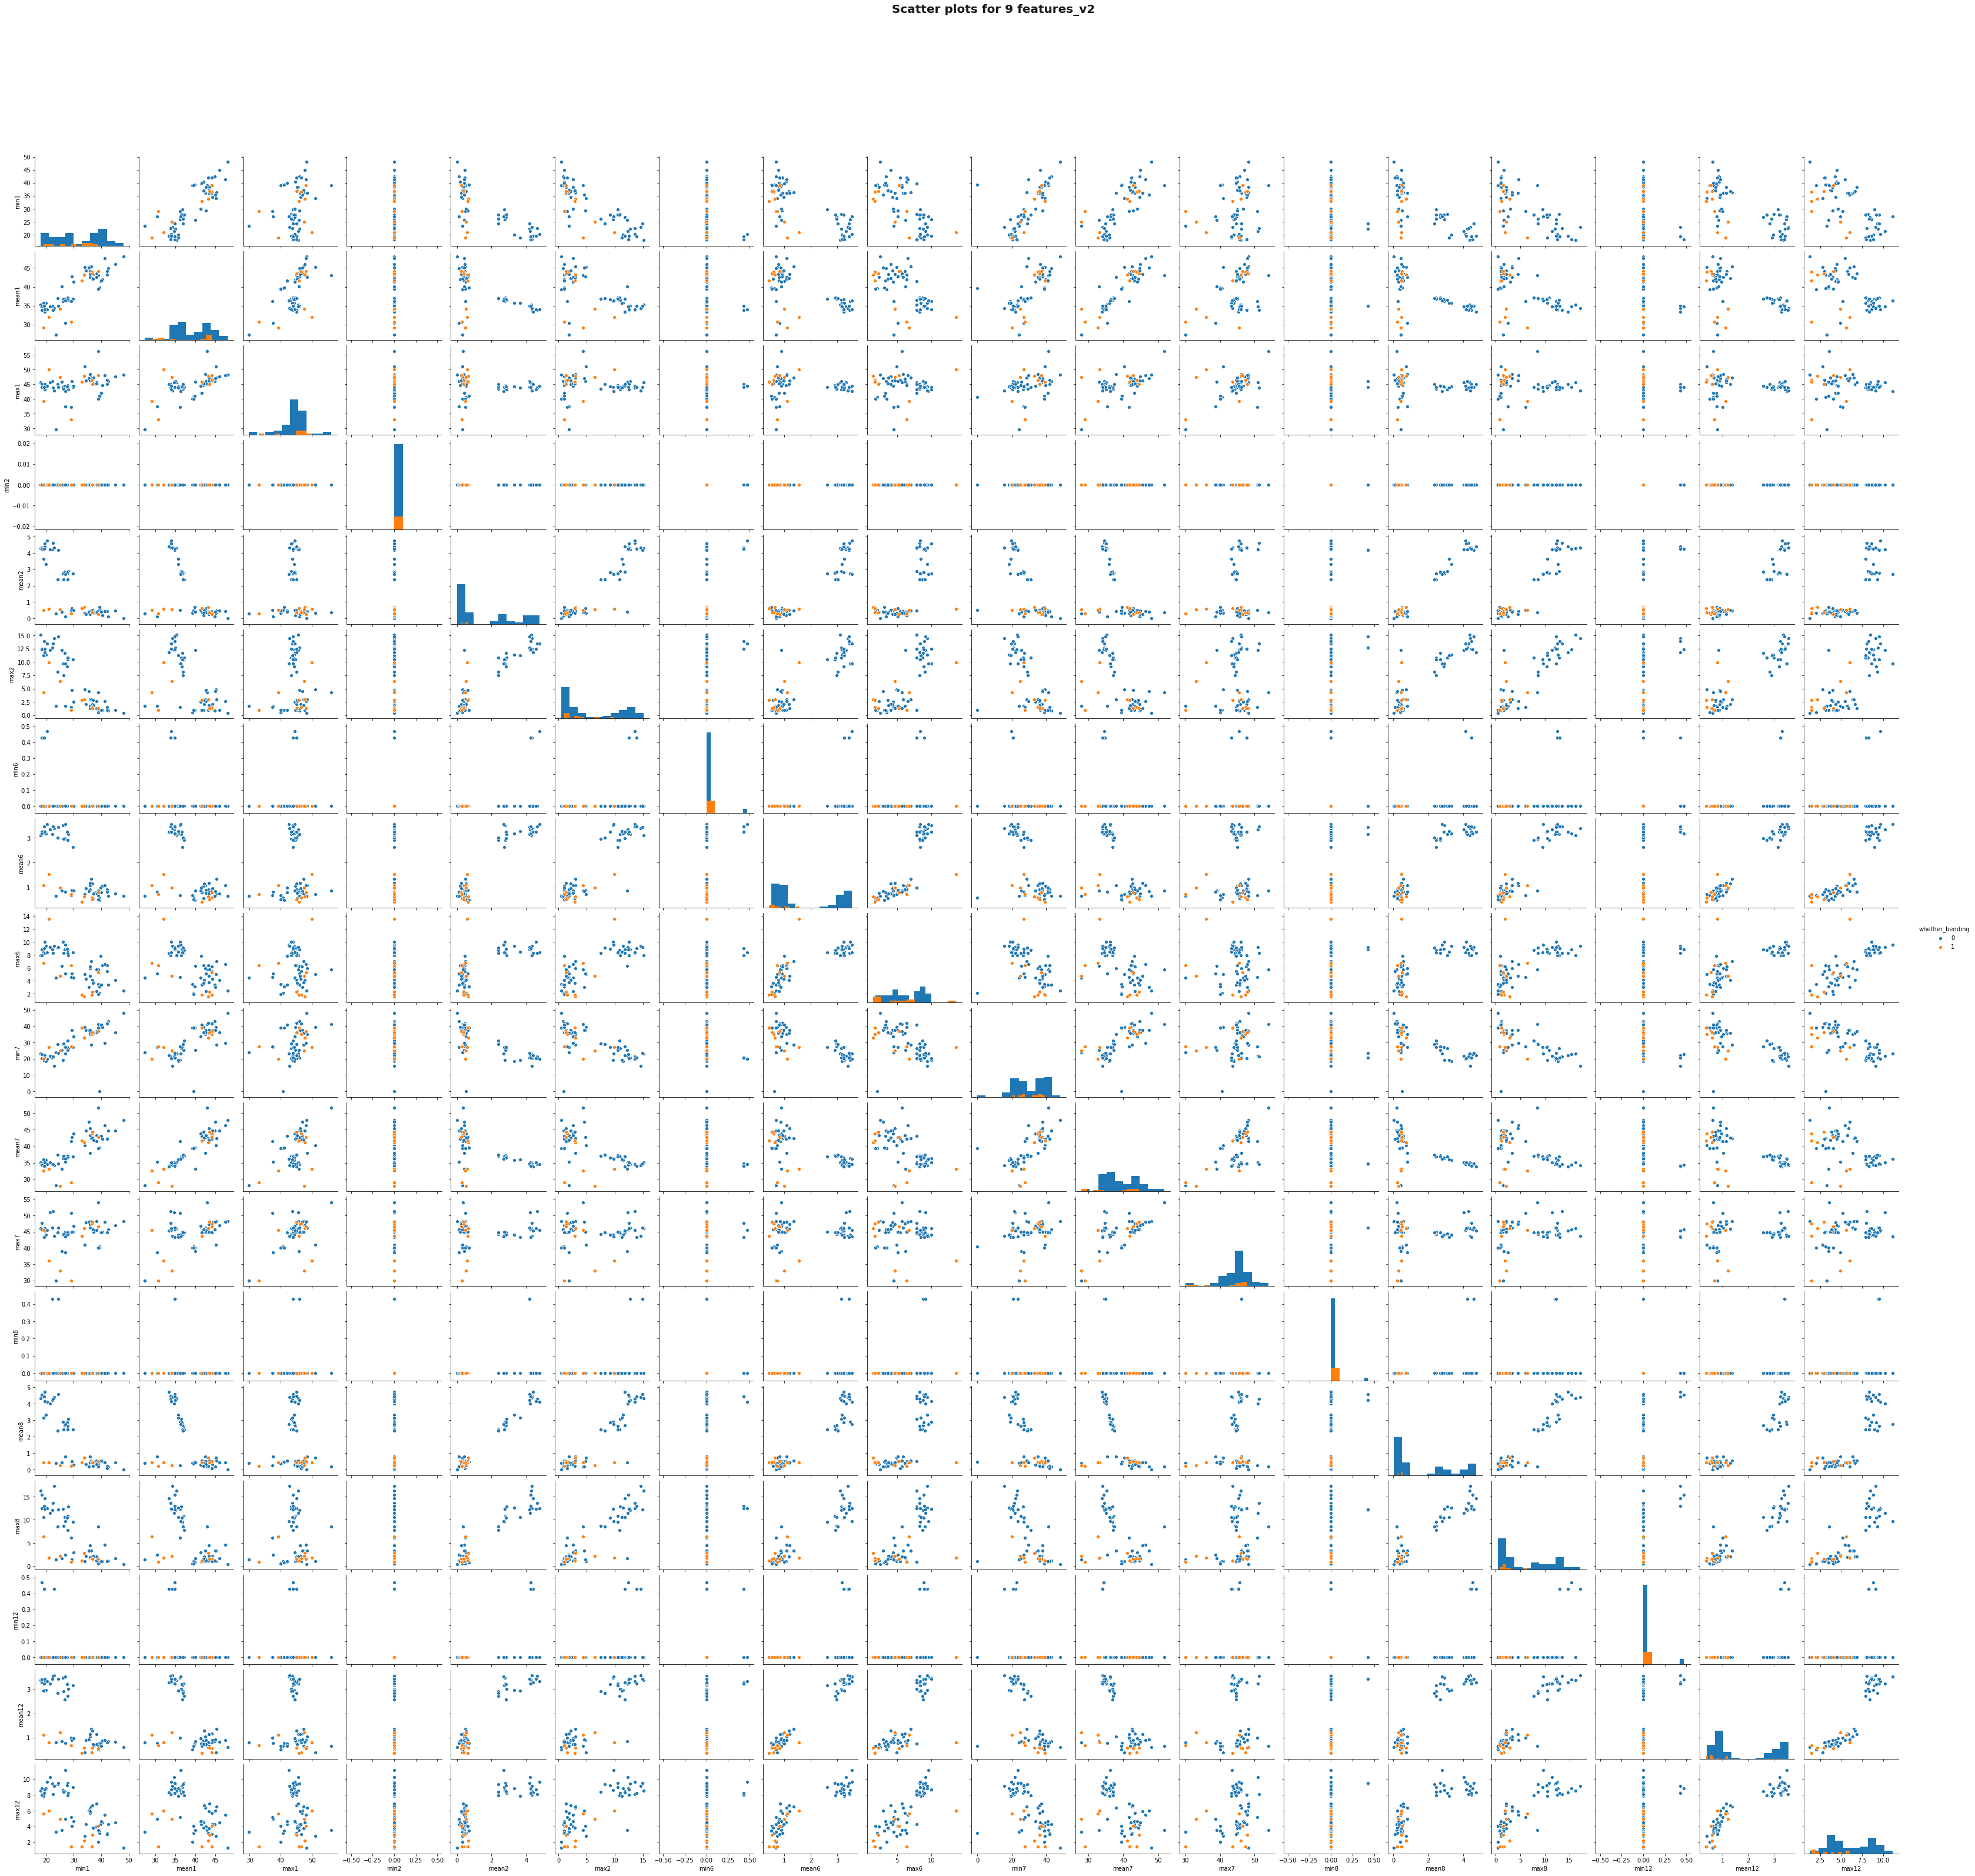

In [24]:
pairplot_2 = sns.pairplot(dii_scatter,hue = 'whether_bending',kind= 'scatter',diag_kind = 'hist')
plt.subplots_adjust(top=0.9)
pairplot_2.fig.suptitle("Scatter plots for 9 features_v2", fontsize=20, alpha=0.9, weight='bold')
plt.show()

### There is no significant difference with d(i)

## d(iii)

In [25]:
def slice_index(l):
    base = 480//l
    remain = 480%l
    lst1 = [base+1 for i in range(remain)]
    lst2 = [base for i in range(l-remain)]
    lst = lst1+lst2
    ans =[]
    start_index = 0
    for value in lst:
        ans.append(start_index)
        start_index+= value
    return ans

def time_series_partition_feature(l):
    global file_name
    time_series_feature = pd.DataFrame()
    for folder in file_name:
        for file in folder:
            df = pd.read_csv(file,sep = ',',skiprows = 5,usecols=[1,2,3,4,5,6],\
                         header=None,names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
            s = slice_index(l)
            s.append(len(df)) # there is a file only have 479 lines, handle this exception
            df = pd.concat([df.iloc[s[i]:s[i+1],].reset_index(drop=True) for i in range(l)],axis =1)
            df_des = df.describe().T[['min','mean', 'max']].reset_index(drop=True)
            colnames = [['min'+str(x), 'mean'+str(x), 'max'+str(x)] for x in range(1,6*l+1)]
            colnames = list(chain.from_iterable(colnames))
            df_des = pd.DataFrame(df_des.to_numpy().reshape(1,6*l*3), columns=colnames)
            time_series_feature = pd.concat([time_series_feature,df_des])
    time_series_feature = time_series_feature.reset_index(drop=True)
    data_bending = time_series_feature.iloc[0:13,]
    data_notbending  = time_series_feature.iloc[13:,]
    data_bending['whether_bending']= 1
    data_notbending['whether_bending']=0
    res = pd.concat([data_bending,data_notbending])
    return res

### The wrong way is to perform cross-validation after choosing a specific l, the correct way is to choose (l, p) simultaneously using cross-validation.

In [26]:
res = {}
for l in range(1,21):
    data = time_series_partition_feature(l)
    #split train and test
    test_index=[]
    start_index = 0
    for fold in file_name:
        if len(fold)!=15:
            test_index = test_index + [start_index,start_index+1]
        else:
            test_index = test_index + [start_index,start_index+1,start_index+2]
        start_index += len(fold)
    train_index = list(set([i for i in range(88)])-set(test_index))
    
    X_train = data.iloc[train_index,:-1]
    y_train = data.iloc[train_index,-1:] 
    
    logreg = LogisticRegression(C=10000000) # with a big C, it has a very weak regularization
    rfecv = RFECV(logreg, cv=5)  # StratifiedKFold is automatically applied for binary data
    selector = rfecv.fit(X_train, y_train)
    
    res[l] = [selector.support_, sum(selector.support_), max(selector.grid_scores_)]

In [27]:
[[i,res[i][1],res[i][2]] for i in res.keys()]

[[1, 6, 1.0],
 [2, 4, 0.9857142857142858],
 [3, 9, 1.0],
 [4, 5, 0.9714285714285715],
 [5, 2, 0.9571428571428573],
 [6, 9, 0.9703296703296704],
 [7, 12, 0.9857142857142858],
 [8, 27, 0.9703296703296704],
 [9, 5, 0.9714285714285715],
 [10, 10, 0.9714285714285715],
 [11, 5, 0.9857142857142858],
 [12, 6, 0.9714285714285715],
 [13, 3, 0.9857142857142858],
 [14, 11, 1.0],
 [15, 30, 0.9703296703296704],
 [16, 17, 0.9846153846153847],
 [17, 4, 0.9714285714285715],
 [18, 4, 0.9857142857142858],
 [19, 11, 0.9857142857142858],
 [20, 9, 0.9857142857142858]]

In [28]:
res[1][0]

array([False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False])

### The best classifier is (l, p) = (1, 6) or (3,9) or (14,11). I will use the simplest one and the chosen parameters are (mean1, max2,mean3,min5,mean5,max5).

## d(iv)

In [29]:
data = time_series_partition_feature(1)
#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

X_train = data.iloc[train_index,:-1]
y_train = data.iloc[train_index,-1:]
logreg = LogisticRegression(C=10000)
rfecv = RFECV(logreg, cv=5)
selector = rfecv.fit(X_train, y_train)
y_pred_train = selector.predict(X_train)

confusion_matrix(y_train, y_pred_train)

# Negative == Non-bending, Positive == Bending
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel() # Flatten the matrix
confusion_matrix_flatten = (tn, fp, fn, tp)
confusion_matrix_flatten

(60, 0, 0, 9)

### 9 True Positives and 60 True Negatives with no error.

In [30]:
y_proba_train = selector.predict_proba(X_train)
y_proba_train_pos = [x[1] for x in y_proba_train]
fpr, tpr, _ = roc_curve(y_train, y_proba_train_pos, pos_label=1)

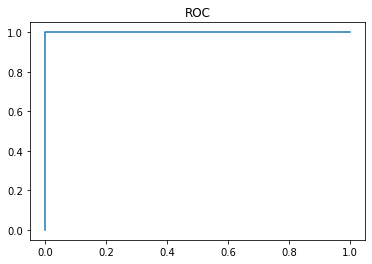

In [31]:
roc = pd.DataFrame(np.column_stack([tpr, fpr]),
                         columns=['tpr', 'fpr'])

plt.plot(roc['fpr'],roc['tpr'],label='ROC')
plt.title('ROC')
plt.show()

In [32]:
roc_auc_score(y_train, y_proba_train_pos)

1.0

In [33]:
train_x = sm.add_constant(X_train.loc[:, ['mean1', 'max2','mean3','min5','mean5','max5']].to_numpy(dtype=float))
train_y = data.iloc[train_index,-1:]
model = sm.Logit(train_y.to_numpy(dtype=float), train_x)
logitres = model.fit(method='bfgs')

print(logitres.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                   1.000
Time:                        22:37:22   Log-Likelihood:            -1.6050e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 9.588e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1539   8.78e+05  -1.3

## d(v)

In [34]:
X_test = data.iloc[test_index,:-1]
y_test = data.iloc[test_index,-1:]

In [35]:
selector.score(X_test, y_test)

1.0

### The accuracy is 1and the same with train data.

## d(vi)

### Due to perfect separation, the logistic regression estimates and standard errors becomes very unstable

## d(vii)

###  We suffer from class imbalance here, only have 9 positive instances but 60 negative instances. Thus, we use downsampling to made the positive instance : negative instance = 9 ：27

In [36]:
#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))
#downsample
downsample= sorted(np.random.choice(train_index[9:], 27, replace=False).tolist())
train_index_re = train_index[:9] + downsample

In [37]:
# repeat searching for best logistic regression
res_2 = {}
for l in range(1,21):
    data = time_series_partition_feature(l)
    #split train and test
    X_train = data.iloc[train_index_re,:-1]
    y_train = data.iloc[train_index_re,-1:] 
    
    logreg = LogisticRegression(C=10000000) # with a big C, it has a very weak regularization
    rfecv = RFECV(logreg, cv=5)  # StratifiedKFold is automatically applied for binary data
    selector = rfecv.fit(X_train, y_train)
    
    res_2[l] = [selector.support_, sum(selector.support_), max(selector.grid_scores_)]

In [38]:
#find best (l,p)
[[i,res_2[i][1],res[i][2]] for i in res.keys()]

[[1, 4, 1.0],
 [2, 6, 0.9857142857142858],
 [3, 6, 1.0],
 [4, 5, 0.9714285714285715],
 [5, 5, 0.9571428571428573],
 [6, 7, 0.9703296703296704],
 [7, 6, 0.9857142857142858],
 [8, 6, 0.9703296703296704],
 [9, 16, 0.9714285714285715],
 [10, 9, 0.9714285714285715],
 [11, 5, 0.9857142857142858],
 [12, 5, 0.9714285714285715],
 [13, 3, 0.9857142857142858],
 [14, 12, 1.0],
 [15, 12, 0.9703296703296704],
 [16, 14, 0.9846153846153847],
 [17, 4, 0.9714285714285715],
 [18, 4, 0.9857142857142858],
 [19, 10, 0.9857142857142858],
 [20, 59, 0.9857142857142858]]

In [39]:
res_2[1][0]

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False])

### The best classifier is (l, p) = (1, 4) or (3,1) or (14,63). I will use the simplest one and the chosen parameters are (mean1, max2,mean5,max5).

In [40]:
data = time_series_partition_feature(1)

X_train = data.iloc[train_index_re,:-1]
y_train = data.iloc[train_index_re,-1:]
X_test = data.iloc[test_index,:-1]
y_test = data.iloc[test_index,-1:]
logreg = LogisticRegression(C=10000)
rfecv = RFECV(logreg, cv=5)
selector = rfecv.fit(X_train, y_train)
y_pred_train = selector.predict(X_train)
y_pred_test = selector.predict(X_test)

In [41]:
list(X_train.columns)

['min1',
 'mean1',
 'max1',
 'min2',
 'mean2',
 'max2',
 'min3',
 'mean3',
 'max3',
 'min4',
 'mean4',
 'max4',
 'min5',
 'mean5',
 'max5',
 'min6',
 'mean6',
 'max6']

In [42]:
#confusion matrix on train data
confusion_matrix(y_train, y_pred_train)

# Negative == Non-bending, Positive == Bending
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel() # Flatten the matrix
confusion_matrix_flatten = (tn, fp, fn, tp)
confusion_matrix_flatten

(27, 0, 0, 9)

In [43]:
#confusion matrix on test data
confusion_matrix(y_test, y_pred_test)

# Negative == Non-bending, Positive == Bending
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel() # Flatten the matrix
confusion_matrix_flatten = (tn, fp, fn, tp)
confusion_matrix_flatten

(15, 0, 0, 4)

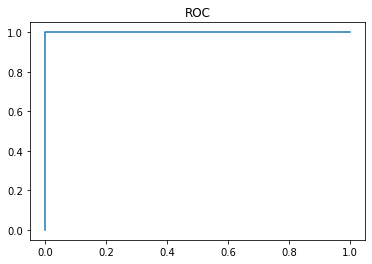

In [44]:
#ROC on train data
y_proba_train = selector.predict_proba(X_train)
y_proba_train_pos = [x[1] for x in y_proba_train]
fpr, tpr, threshold = roc_curve(y_train, y_proba_train_pos, pos_label=1)

roc = pd.DataFrame(np.column_stack([tpr, fpr]),
                         columns=['tpr', 'fpr'])

plt.plot(roc['fpr'],roc['tpr'],label='ROC')
plt.title('ROC')
plt.show()

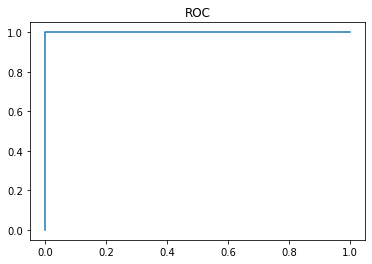

In [45]:
#ROC on test data
y_proba_test = selector.predict_proba(X_test)
y_proba_test_pos = [x[1] for x in y_proba_test]
fpr_2, tpr_2, threshold = roc_curve(y_test, y_proba_test_pos, pos_label=1)

roc = pd.DataFrame(np.column_stack([tpr_2, fpr_2]),
                         columns=['tpr', 'fpr'])

plt.plot(roc['fpr'],roc['tpr'],label='ROC')
plt.title('ROC')
plt.show()

In [46]:
roc_auc_score(y_train, y_proba_train_pos)

1.0

In [47]:
roc_auc_score(y_test, y_proba_test_pos)

1.0

## e(i)

In [48]:
best_C = [] # Get the 20 Cs selected for l ranging from 1 to 20
best_cv_score = [] # Get the 20 cv-scores corresponding to the best C selected for l ranging from 1 to 20
for l in range(1,21):
    data = time_series_partition_feature(l)
    #Min-Max Normalization
    data_n = data.iloc[:,:-1].values
    colname = list(data.iloc[:,:-1].columns)
    min_max_scaler = preprocessing.MinMaxScaler() 
    df_re = min_max_scaler.fit_transform(data_n)
    df_re = pd.DataFrame(df_re,columns=colname)
    data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)
    
    #split train and test
    test_index=[]
    start_index = 0
    for fold in file_name:
        if len(fold)!=15:
            test_index = test_index + [start_index,start_index+1]
        else:
            test_index = test_index + [start_index,start_index+1,start_index+2]
        start_index += len(fold)
    train_index = list(set([i for i in range(88)])-set(test_index))
    
    X_train = data_norm.iloc[train_index,:-1]
    y_train = data_norm.iloc[train_index,-1:]
    logregcv = LogisticRegressionCV(Cs=np.logspace(-1, 1, 100), 
                                    cv=5,
                                    penalty='l1', 
                                    solver='saga', # Compatible with L1 regularization
                                    n_jobs=-1,
                                    class_weight='balanced', # Deal with class inbalance
                                    max_iter=10000)
    logregcv.fit(X_train, y_train)
    C_index = np.where(logregcv.Cs_ == logregcv.C_)[0][0]
    best_C.append(logregcv.C_[0])
    best_cv_score.append(np.mean(list(zip(*logregcv.scores_[1]))[C_index]))

In [49]:
best_C

[0.20092330025650468,
 0.22051307399030456,
 1.0235310218990263,
 0.9770099572992254,
 0.24201282647943823,
 0.5094138014816381,
 0.4430621457583881,
 0.40370172585965547,
 0.23101297000831597,
 0.23101297000831597,
 0.35111917342151316,
 0.23101297000831597,
 0.5590810182512224,
 0.6135907273413174,
 0.4862601580065355,
 0.38535285937105296,
 0.35111917342151316,
 0.40370172585965547,
 0.2104904144512021,
 0.2104904144512021]

In [50]:
best_cv_score

[0.9714285714285715,
 0.9714285714285715,
 0.9714285714285715,
 0.9571428571428573,
 0.9428571428571428,
 0.9571428571428571,
 0.9714285714285715,
 0.9714285714285715,
 0.9714285714285715,
 0.9428571428571428,
 0.9571428571428571,
 0.9428571428571428,
 0.9714285714285715,
 0.9571428571428571,
 0.9274725274725275,
 0.9571428571428571,
 0.9428571428571428,
 0.9714285714285715,
 0.9714285714285715,
 0.9571428571428573]

### According to the best_cv_score, the best (l, C) is found to be (1, 0.20092330025650468)

## e(ii)

In [51]:
data = time_series_partition_feature(1)
#Min-Max Normalization
data_n = data.iloc[:,:-1].values
colname = list(data.iloc[:,:-1].columns)
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(data_n)
df_re = pd.DataFrame(df_re,columns=colname)
data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)

#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

X_train = data_norm.iloc[train_index,:-1]
y_train = data_norm.iloc[train_index,-1:]
X_test = data_norm.iloc[test_index,:-1]
y_test = data_norm.iloc[test_index,-1:]

logreg_l1 = LogisticRegression(C=0.20092330025650468, 
                               penalty='l1', 
                               solver='saga',
                               class_weight='balanced',
                               n_jobs=-1,
                               max_iter=10000)
logreg_l1.fit(X_train, y_train)

LogisticRegression(C=0.20092330025650468, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
logreg_l1.score(X_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, logreg_l1.predict(X_test)).ravel() # Flatten the matrix
confusion_matrix_flatten = (tn, fp, fn, tp)
confusion_matrix_flatten

(15, 0, 0, 4)

### We both have perfect accuracy scores in L1-regularized logistic regression and former logistic regression with or without case-control sampling. However, the computation of the regularized regressionis lighter because regularized regression undergoes a fixed number of cv given the fixed parameter grid of lambdas. In contrast, backward selection with lots of features becomes very time consuming.

## f(i)

In [53]:
def slice_index(l):
    base = 480//l
    remain = 480%l
    lst1 = [base+1 for i in range(remain)]
    lst2 = [base for i in range(l-remain)]
    lst = lst1+lst2
    ans =[]
    start_index = 0
    for value in lst:
        ans.append(start_index)
        start_index+= value
    return ans

def time_series_partition_feature_v2(l):
    global file_name
    time_series_feature = pd.DataFrame()
    for folder in file_name:
        for file in folder:
            df = pd.read_csv(file,sep = ',',skiprows = 5,usecols=[1,2,3,4,5,6],\
                         header=None,names = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
            s = slice_index(l)
            s.append(len(df)) # there is a file only have 479 lines, handle this exception
            df = pd.concat([df.iloc[s[i]:s[i+1],].reset_index(drop=True) for i in range(l)],axis =1)
            df_des = df.describe().T[['min','mean', 'max']].reset_index(drop=True)
            colnames = [['min'+str(x), 'mean'+str(x), 'max'+str(x)] for x in range(1,6*l+1)]
            colnames = list(chain.from_iterable(colnames))
            df_des = pd.DataFrame(df_des.to_numpy().reshape(1,6*l*3), columns=colnames)
            df_des['action'] = file.split('/')[3] if (file.split('/')[3]!= 'bending1'and  file.split('/')[3]!='bending2') else 'bending'
            time_series_feature = pd.concat([time_series_feature,df_des])
    time_series_feature = time_series_feature.reset_index(drop=True)
    return time_series_feature

In [54]:
best_C = []
best_cv_score = [] 
for l in range(1,21):
    data = time_series_partition_feature_v2(l)
    #Min-Max Normalization
    data_n = data.iloc[:,:-1].values
    colname = list(data.iloc[:,:-1].columns)
    min_max_scaler = preprocessing.MinMaxScaler() 
    df_re = min_max_scaler.fit_transform(data_n)
    df_re = pd.DataFrame(df_re,columns=colname)
    data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)
    
    #split train and test
    test_index=[]
    start_index = 0
    for fold in file_name:
        if len(fold)!=15:
            test_index = test_index + [start_index,start_index+1]
        else:
            test_index = test_index + [start_index,start_index+1,start_index+2]
        start_index += len(fold)
    train_index = list(set([i for i in range(88)])-set(test_index))
    
    X_train = data_norm.iloc[train_index,:-1]
    y_train = data_norm.iloc[train_index,-1:]
    logregcv_multi = LogisticRegressionCV(Cs=np.logspace(-1, 1, 100), 
                                       cv=5,
                                       penalty='l1', 
                                       solver='saga', 
                                       multi_class='auto', # Multiclass classification
                                       n_jobs=-1,
                                       max_iter=10000)
    logregcv_multi.fit(X_train, y_train)
    C_index = np.where(logregcv_multi.Cs_ == logregcv_multi.C_[0])[0][0]
    best_C.append(logregcv_multi.C_[0])
    best_cv_score.append(np.mean(list(zip(*logregcv_multi.scores_['bending']))[C_index]))

In [55]:
best_cv_score

[0.8406593406593407,
 0.8703296703296705,
 0.7549450549450549,
 0.8142857142857143,
 0.8263736263736264,
 0.8131868131868132,
 0.7681318681318681,
 0.8274725274725275,
 0.7703296703296703,
 0.7384615384615385,
 0.7417582417582418,
 0.7703296703296703,
 0.7538461538461538,
 0.6967032967032967,
 0.7395604395604396,
 0.724175824175824,
 0.7835164835164836,
 0.7263736263736263,
 0.7538461538461538,
 0.7263736263736263]

In [56]:
best_C

[1.873817422860385,
 1.484968262254465,
 1.873817422860385,
 8.697490026177835,
 1.1768119524349985,
 1.0722672220103238,
 1.7886495290574351,
 1.6297508346206444,
 3.27454916287773,
 1.4174741629268055,
 1.484968262254465,
 1.2328467394420666,
 0.8497534359086445,
 0.6135907273413174,
 2.1544346900318843,
 0.8902150854450388,
 0.6135907273413174,
 1.0235310218990263,
 1.7886495290574351,
 1.484968262254465]

### According to the best_cv_score, the best (l, C) is found to be (2, 1.484968262254465)

In [57]:
#using the optimal (l,c)
data = time_series_partition_feature_v2(1)
#Min-Max Normalization
data_n = data.iloc[:,:-1].values
colname = list(data.iloc[:,:-1].columns)
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(data_n)
df_re = pd.DataFrame(df_re,columns=colname)
data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)

#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

X_train = data_norm.iloc[train_index,:-1]
y_train = data_norm.iloc[train_index,-1:]
X_test = data_norm.iloc[test_index,:-1]
y_test = data_norm.iloc[test_index,-1:]

logregmc_l1 = LogisticRegression(C=1.484968262254465, 
                                 penalty='l1', 
                                 solver='saga', 
                                 multi_class='auto',
                                 n_jobs=-1,
                                 max_iter=10000)
logregmc_l1.fit(X_train, y_train)

LogisticRegression(C=1.484968262254465, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#test data accuracy
logregmc_l1.score(X_test, y_test)

0.8947368421052632

In [59]:
# test error
1- logregmc_l1.score(X_test, y_test)

0.10526315789473684

In [60]:
# confusion matrix for test data
y_pred = logregmc_l1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

### The elements on diagonal represent correct predictions and others represent wrong prediction.

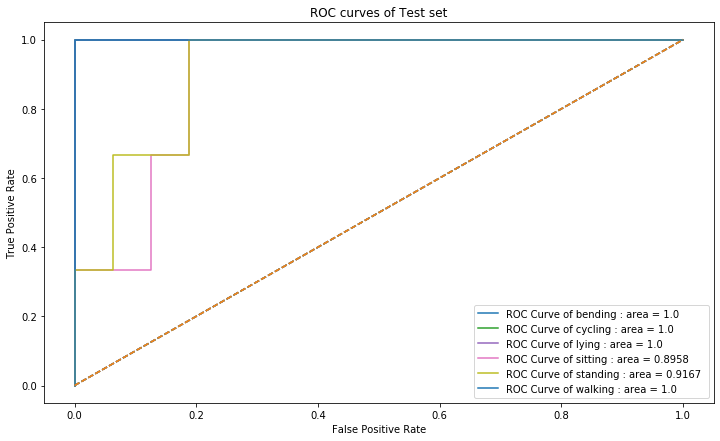

In [61]:
y_test_proba = logregmc_l1.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(12, 7))
for i, c in enumerate(logregmc_l1.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 4)))
    axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of Test set")
plt.show()

## f(ii)

In [62]:
#Naive Bayes' classifier
cv_score = []
for l in range(1, 21):
    data = time_series_partition_feature_v2(l)
    #Min-Max Normalization
    data_n = data.iloc[:,:-1].values
    colname = list(data.iloc[:,:-1].columns)
    min_max_scaler = preprocessing.MinMaxScaler() 
    df_re = min_max_scaler.fit_transform(data_n)
    df_re = pd.DataFrame(df_re,columns=colname)
    data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)
    
    #split train and test
    test_index=[]
    start_index = 0
    for fold in file_name:
        if len(fold)!=15:
            test_index = test_index + [start_index,start_index+1]
        else:
            test_index = test_index + [start_index,start_index+1,start_index+2]
        start_index += len(fold)
    train_index = list(set([i for i in range(88)])-set(test_index))
    
    X_train = data_norm.iloc[train_index,:-1]
    y_train = data_norm.iloc[train_index,-1:]
    gnb = GaussianNB()
    cv_score.append(cross_val_score(gnb, X_train, y_train, cv=5, n_jobs=-1)) # Get 5-fold cross-validation score

In [63]:
list(map(np.mean, cv_score)) 

[0.798901098901099,
 0.8417582417582418,
 0.7824175824175824,
 0.7681318681318682,
 0.6802197802197802,
 0.7120879120879121,
 0.7835164835164835,
 0.7406593406593406,
 0.6956043956043956,
 0.6956043956043956,
 0.6516483516483518,
 0.5945054945054945,
 0.6516483516483516,
 0.6087912087912088,
 0.5659340659340659,
 0.5934065934065934,
 0.5648351648351648,
 0.5219780219780219,
 0.5505494505494505,
 0.5373626373626373]

### Best l is 2.

In [64]:
#using the optimal l
data = time_series_partition_feature_v2(1)
#Min-Max Normalization
data_n = data.iloc[:,:-1].values
colname = list(data.iloc[:,:-1].columns)
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(data_n)
df_re = pd.DataFrame(df_re,columns=colname)
data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)

#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

X_train = data_norm.iloc[train_index,:-1]
y_train = data_norm.iloc[train_index,-1:]
X_test = data_norm.iloc[test_index,:-1]
y_test = data_norm.iloc[test_index,-1:]

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9473684210526315

In [65]:
#test error
1- gnb.score(X_test, y_test)

0.052631578947368474

In [66]:
# confusion matrix for test data
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

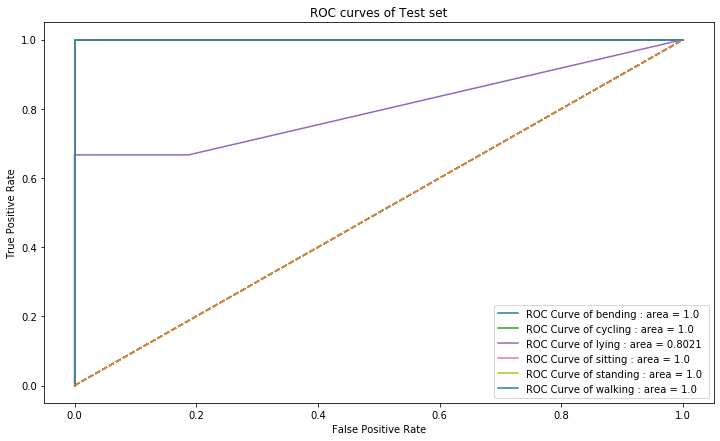

In [67]:
y_test_proba = gnb.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(12, 7))
for i, c in enumerate(gnb.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 4)))
    axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of Test set")
plt.show()

In [68]:
# Multinomial Naive Bayes
# Hyperparameters
params = {'alpha': np.logspace(-2, 2, 100)}

best_score = []
best_param = []
for l in range(1, 21):
    data = time_series_partition_feature_v2(l)
    #Min-Max Normalization
    data_n = data.iloc[:,:-1].values
    colname = list(data.iloc[:,:-1].columns)
    min_max_scaler = preprocessing.MinMaxScaler() 
    df_re = min_max_scaler.fit_transform(data_n)
    df_re = pd.DataFrame(df_re,columns=colname)
    data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)
    
    #split train and test
    test_index=[]
    start_index = 0
    for fold in file_name:
        if len(fold)!=15:
            test_index = test_index + [start_index,start_index+1]
        else:
            test_index = test_index + [start_index,start_index+1,start_index+2]
        start_index += len(fold)
    train_index = list(set([i for i in range(88)])-set(test_index))
    
    X_train = data_norm.iloc[train_index,:-1]
    y_train = data_norm.iloc[train_index,-1:]
    mnb = MultinomialNB()
    mnb_cv = GridSearchCV(estimator=mnb,
                          param_grid=params,
                          cv=5, n_jobs=-1, iid=False)
    mnb_cv.fit(X_train, y_train)
    best_score.append(mnb_cv.best_score_)
    best_param.append(mnb_cv.best_params_)

In [69]:
best_score

[0.665934065934066,
 0.6824175824175824,
 0.665934065934066,
 0.667032967032967,
 0.7384615384615385,
 0.7109890109890109,
 0.7252747252747253,
 0.724175824175824,
 0.7252747252747253,
 0.767032967032967,
 0.7241758241758243,
 0.724175824175824,
 0.7373626373626374,
 0.7516483516483516,
 0.7384615384615385,
 0.7813186813186812,
 0.7527472527472527,
 0.767032967032967,
 0.7373626373626374,
 0.7527472527472527]

In [70]:
best_param 

[{'alpha': 0.033516026509388425},
 {'alpha': 0.01},
 {'alpha': 0.01},
 {'alpha': 0.9545484566618342},
 {'alpha': 0.04862601580065353},
 {'alpha': 0.012045035402587823},
 {'alpha': 0.41320124001153385},
 {'alpha': 0.9545484566618342},
 {'alpha': 0.25950242113997374},
 {'alpha': 0.01},
 {'alpha': 0.8697490026177834},
 {'alpha': 0.9545484566618342},
 {'alpha': 0.9545484566618342},
 {'alpha': 0.023101297000831605},
 {'alpha': 0.027825594022071243},
 {'alpha': 0.01},
 {'alpha': 0.08497534359086446},
 {'alpha': 0.7924828983539177},
 {'alpha': 0.41320124001153385},
 {'alpha': 0.01}]

### The best (l,alpha) is (16,0.01)

In [71]:
#using the optimal l,alpha
data = time_series_partition_feature_v2(1)
#Min-Max Normalization
data_n = data.iloc[:,:-1].values
colname = list(data.iloc[:,:-1].columns)
min_max_scaler = preprocessing.MinMaxScaler() 
df_re = min_max_scaler.fit_transform(data_n)
df_re = pd.DataFrame(df_re,columns=colname)
data_norm = pd.concat([df_re,data.iloc[:,-1:]],axis=1)

#split train and test
test_index=[]
start_index = 0
for fold in file_name:
    if len(fold)!=15:
        test_index = test_index + [start_index,start_index+1]
    else:
        test_index = test_index + [start_index,start_index+1,start_index+2]
    start_index += len(fold)
train_index = list(set([i for i in range(88)])-set(test_index))

X_train = data_norm.iloc[train_index,:-1]
y_train = data_norm.iloc[train_index,-1:]
X_test = data_norm.iloc[test_index,:-1]
y_test = data_norm.iloc[test_index,-1:]
mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.6842105263157895

In [72]:
1- mnb.score(X_test, y_test)

0.3157894736842105

In [73]:
# confusion matrix for test data
y_pred = mnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3, 1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 3]], dtype=int64)

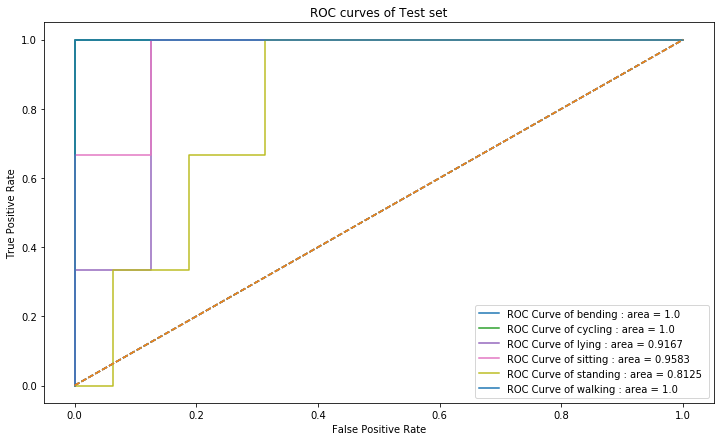

In [74]:
y_test_proba = mnb.predict_proba(X_test)
fig, axes = plt.subplots(figsize=(12, 7))
for i, c in enumerate(mnb.classes_):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, i], pos_label=c)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label="ROC Curve of {} : area = {} ".format(c, round(roc_auc, 4)))
    axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curves of Test set")
plt.show()

### The accuracy of L1-penalized multinomial logisitic regression model is 0.8947368421052632. <br /> The accuracy of Gaussian Naive Bayes is 0.9473684210526315.  <br /> The accuracy of Multinomial Naive Bayes is 0.6842105263157895.  <br /> Therefore, Gaussian Naive Bayes is better for this multi-class classficiation.

## ISLR 3.7.4

### (a) As is known that the true relationship between X and Y is linear,  the least squares line may be close to the true regression line, but I would expect a lower training RSS for the cubic regression. Because adding variables in linear regression usually produces better results in terms of train error even some variables are not significant.

### (b) Polynomial regression will have a higher test RSS as the overfit from training would have more error than the linear regression.

### (c) I would expect a lower training RSS for the cubic regression. A more flexible model can results in a lower training RSS.

### (d) We don't have enough information because we don't know how far the true relationship is from linear. If it is closer to linear than cubic, then linear regression might perform better. If not, the cubic regression will win. It's bias-variance trade off.

## ISLR, 4.8.3

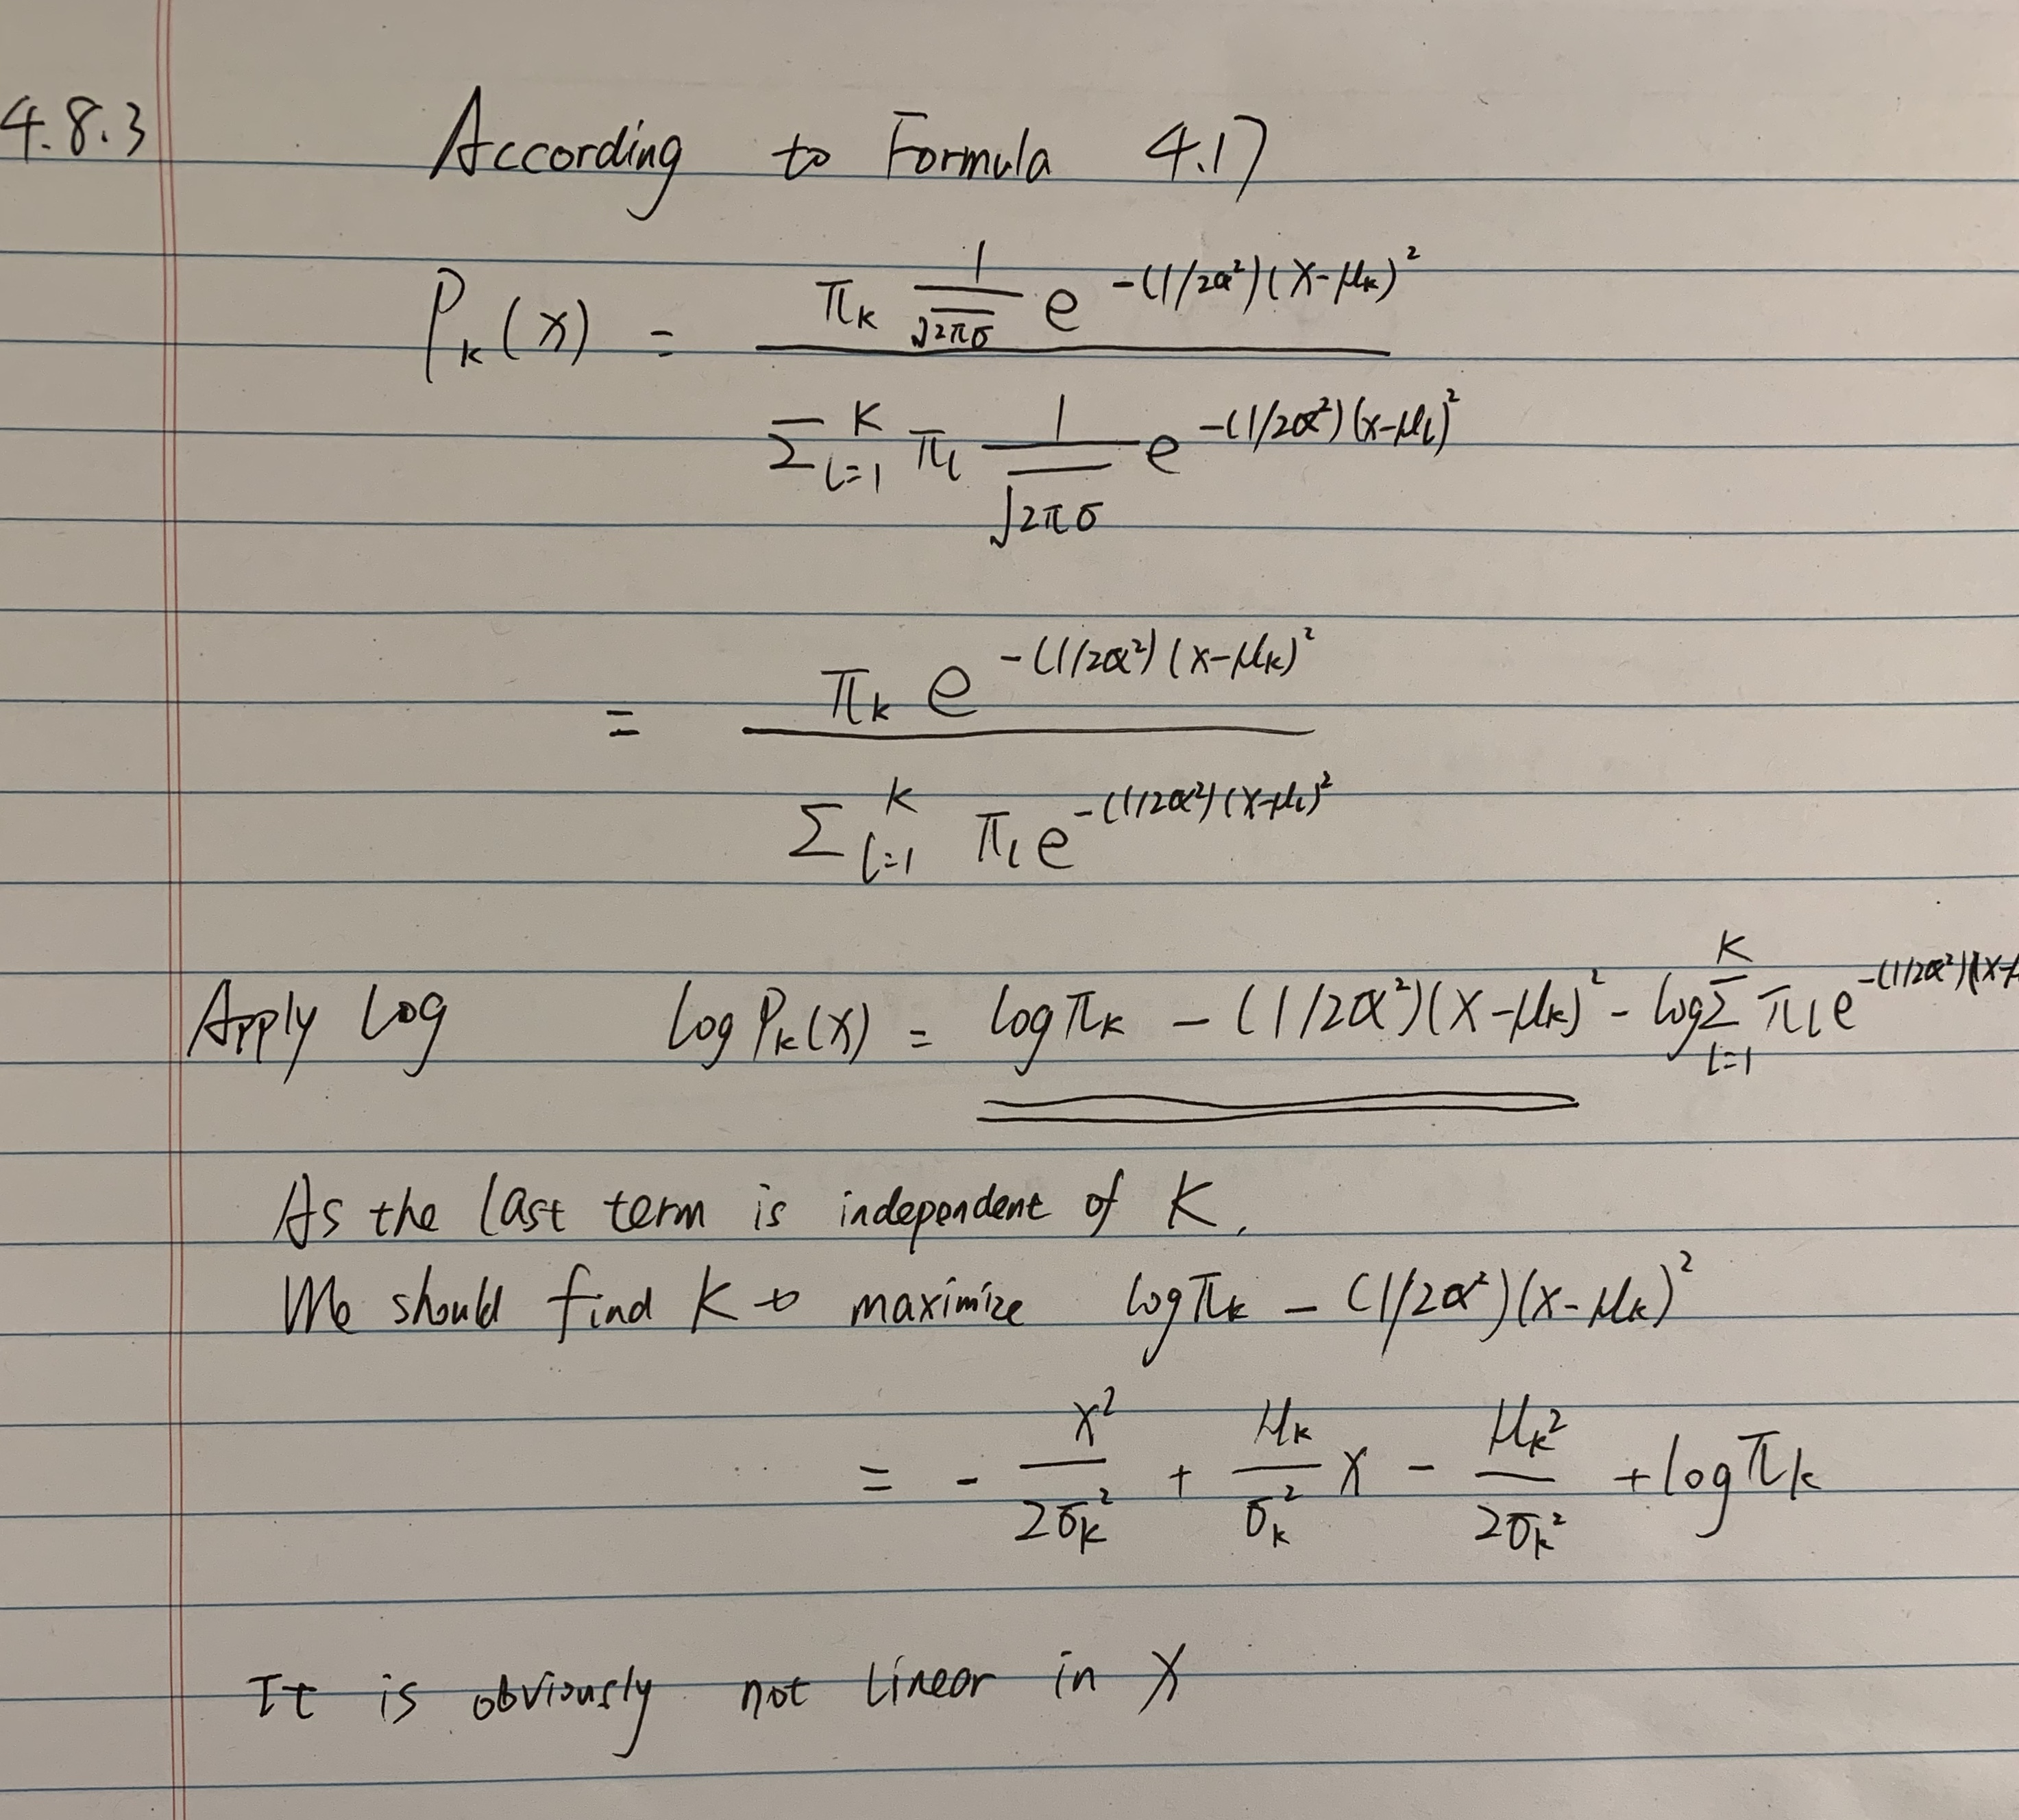

In [106]:
Image('4.8.3.jpg')

## ISLR 4.8.7

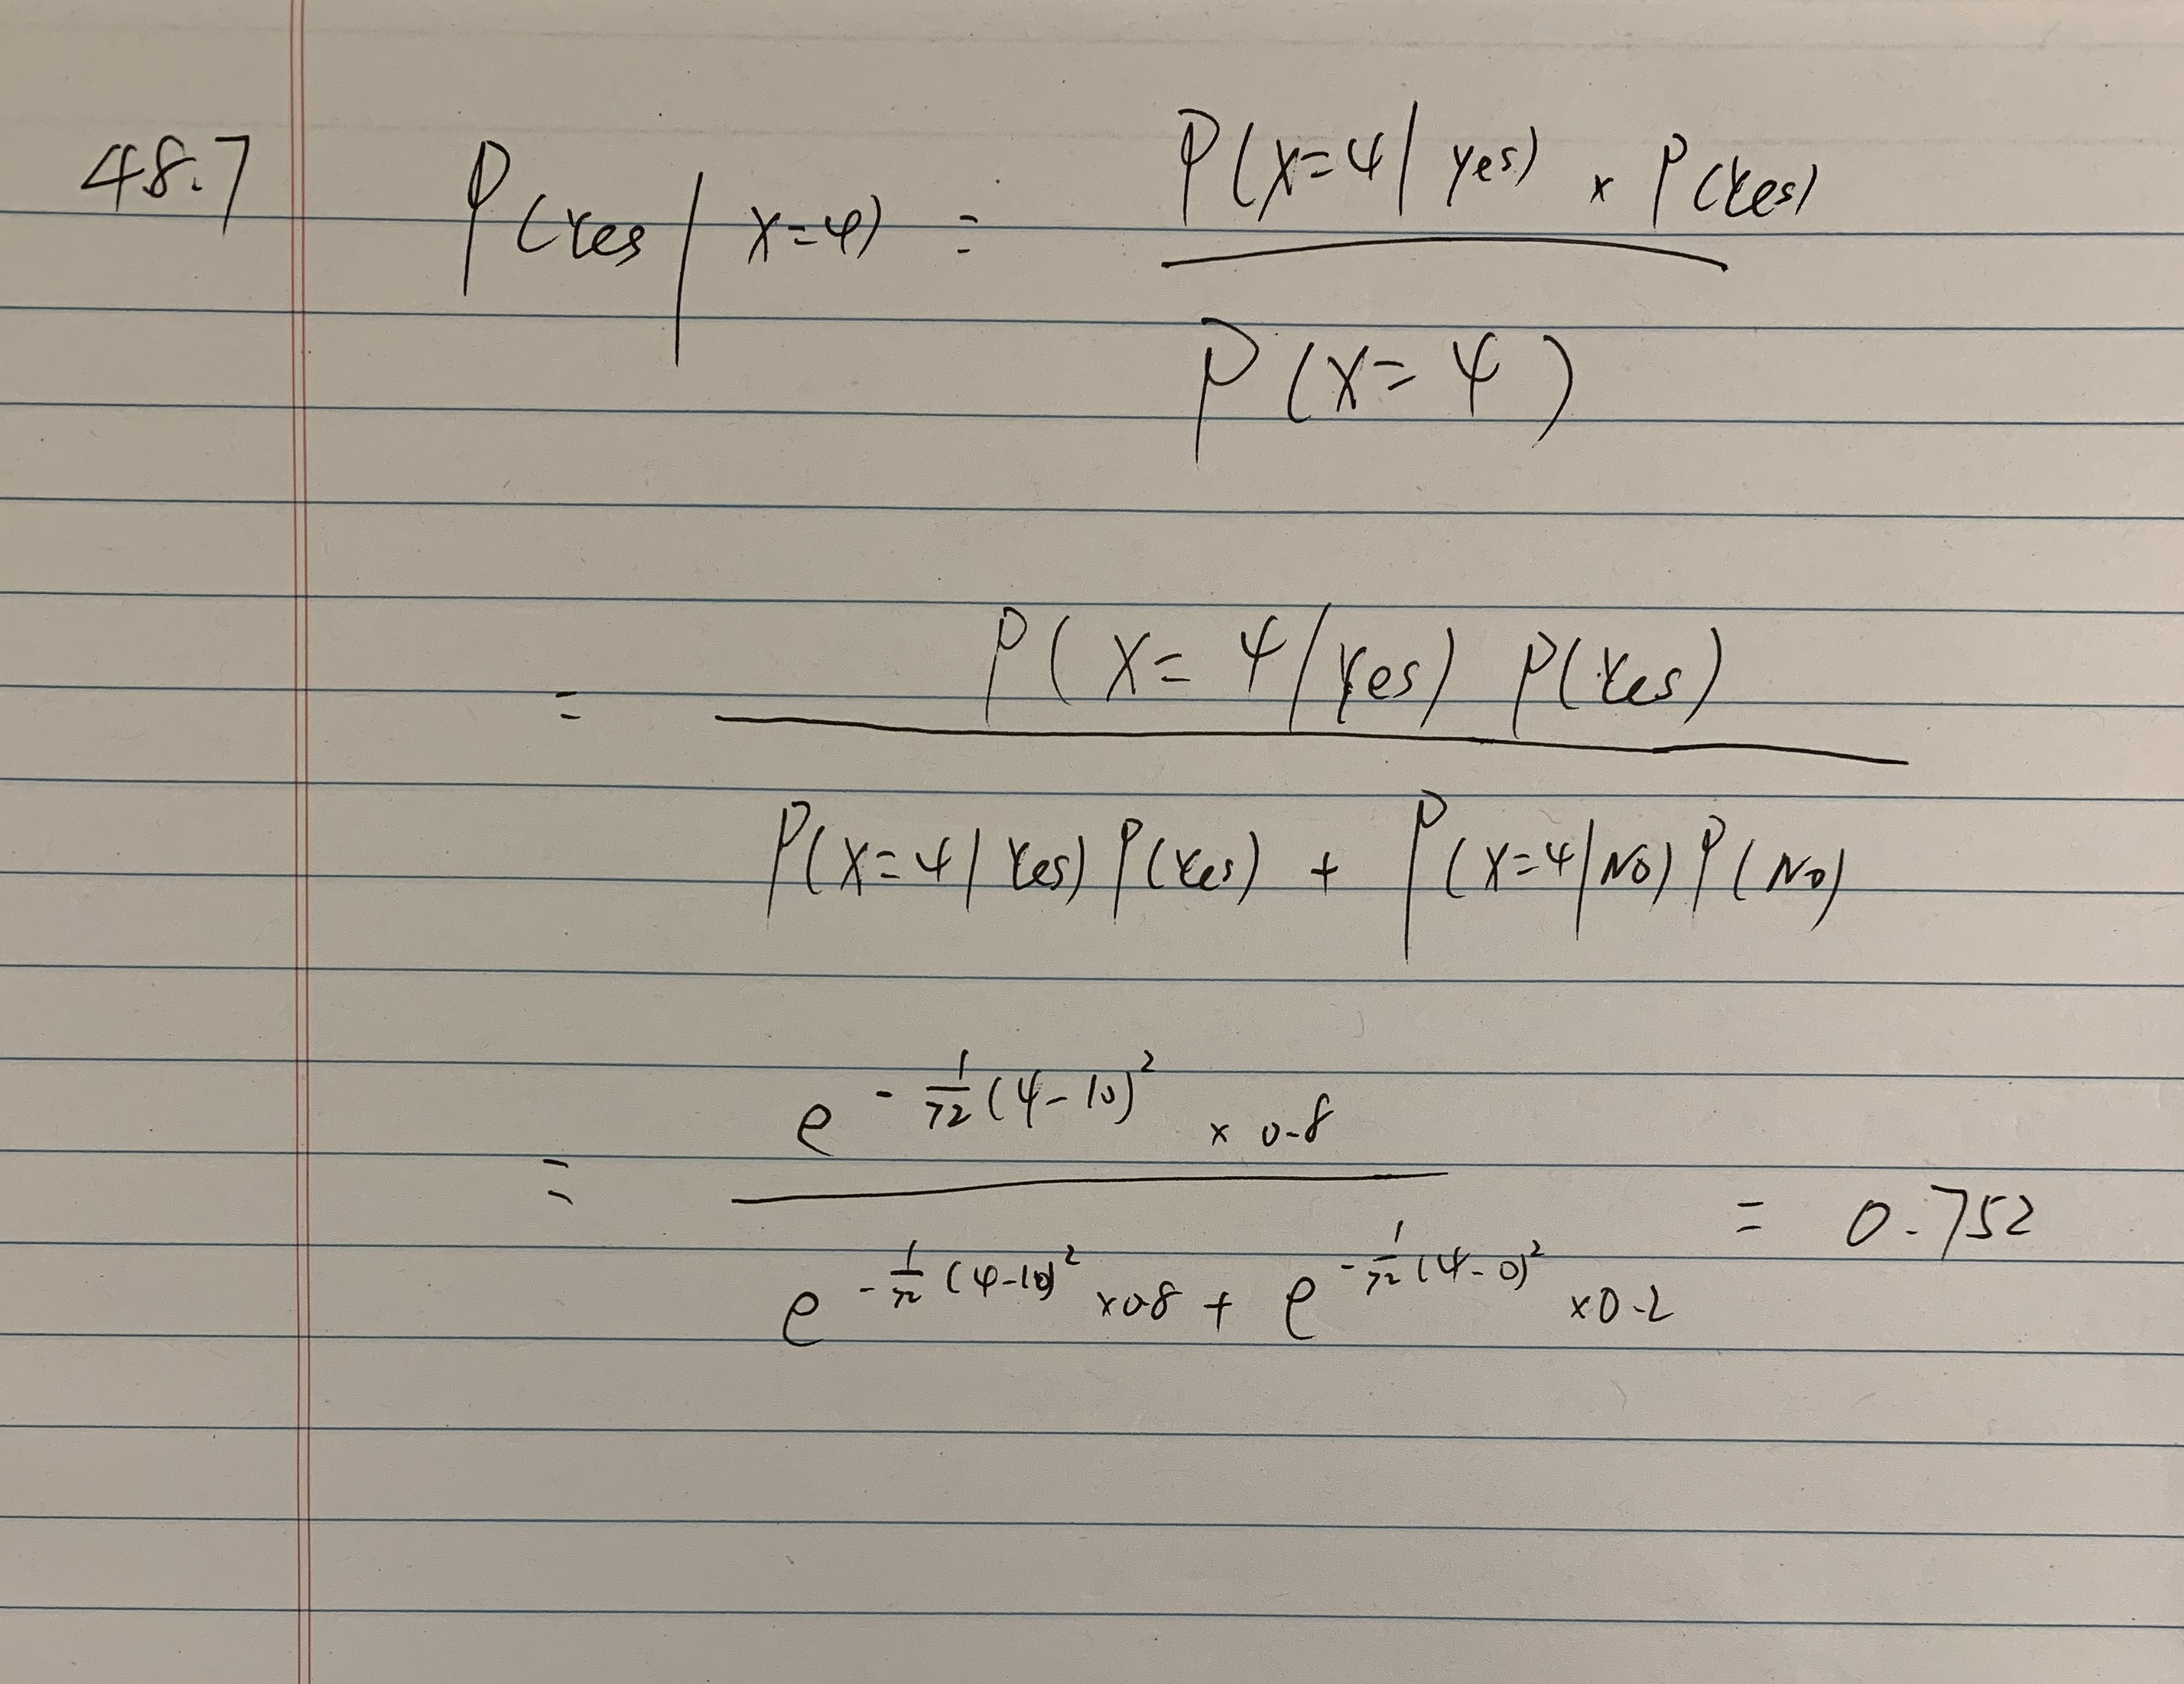

In [107]:
Image('4.8.7.jpg')